# Experimentos con Dataset VGGish Espectros
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/vggish/espectros*
* Módulo de carga de datos: */src/cargaDatosVggishEspectros.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para las características extraídas para read text y vocales con vggis. Ejemplo: load_vggish_espec_v_A() o load_vggish_espec_rt()

**Comentar un poco resultados y conclusiones finales**

* Resultados en el orden normal de los experimentos: 0.6-0.8, llegando casos hasta 0.85, sin llegar a los mejores resultados hasta ahora.
* Cabe destacar que en este caso el conjunto de datos que mejor funciona es el de la vocal A. Las ccas del read-text bajan el rendimiento con estos espectros comparados con los embeddings. Esto podrá ser ya que los embeddings substraen información y patrones y esto puede ser mas util en frases habladas que en vocales sostenidas.
* MLP con los espectros clasifica peor que con los embeddings: los embeddings están sacados con una red de Deep Learning la cual está pensada para clasificar con una red neuronal (como MLP).

* **Mejor resultado:GridSearch SVM: 0.861**


<a id="index"></a>
## Índice del notebook
1. [Experimentos Espectros VGGish](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
    1. [|Apartado Formativo| Recalcar importancia de búsqueda de parámetros.](#GSfrom)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [Grid Search \ Seleckt KBest + GBC](#skgbc)

 ----------------------

In [0]:
import cargaDatosVggishEspectros

from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold

from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

# 1. Experimentos Espectros VGGish <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Hemos añadido el perceptron multicapa respecto a otros experimentos. sklearn.neural_network.MLPClassifier.

In [0]:
tipoDatos = "cargaDatosVggishEspectros"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"RT_Espectros",
        "ORIGIN": tipoDatos+".load_vggish_espec_rt",
    },
    {
        "ID_DATA":"A_Espectros",
        "ORIGIN": tipoDatos+".load_vggish_espec_v_A",
    },
    {
        "ID_DATA":"E_Espectros",
        "ORIGIN": tipoDatos+".load_vggish_espec_v_E",
    },
    
    
    {
        "ID_DATA":"I_Espectros",
        "ORIGIN":tipoDatos+".load_vggish_espec_v_I",
    },
    {
        "ID_DATA":"O_Espectros",
        "ORIGIN":tipoDatos+".load_vggish_espec_v_O",
    },
    {
        "ID_DATA":"U_Espectros",
        "ORIGIN":tipoDatos+".load_vggish_espec_v_U",
    }
]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"MLP100",
        "ALGO": "sklearn.neural_network.MLPClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"MLP10",
        "ALGO": "sklearn.neural_network.MLPClassifier",
        "PARAMS":{ "hidden_layer_sizes":10
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: **SVM GBC y MLP para rt_espectros, A_espectros : 0.78**. 0 por encima del 0.8.

**NO** hay mejora significativa ni debido a las nuevas características. Resultados en la medida de anteriores experimentos.

In [0]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Espectros,0.600000,0.620000,0.600000,0.620000,0.700000,0.620000,0.510000,0.730000,0.730000,0.610000
A_Espectros,0.739048,0.653333,0.671905,0.762619,0.720238,0.741905,0.489524,0.744524,0.788095,0.734524
E_Espectros,0.715460,0.642118,0.670222,0.695131,0.665230,0.698194,0.514392,0.707824,0.686995,0.693539
I_Espectros,0.690481,0.669782,0.665850,0.712183,0.651432,0.691863,0.480405,0.680031,0.705656,0.697633
O_Espectros,0.668330,0.612336,0.615316,0.681766,0.662205,0.651271,0.503829,0.646843,0.680604,0.657670
U_Espectros,0.673692,0.586769,0.642615,0.686154,0.678615,0.634769,0.472154,0.610615,0.704923,0.670154
MEDIA,0.681168,0.630723,0.644318,0.692976,0.679620,0.673000,0.495051,0.686640,0.716046,0.677253


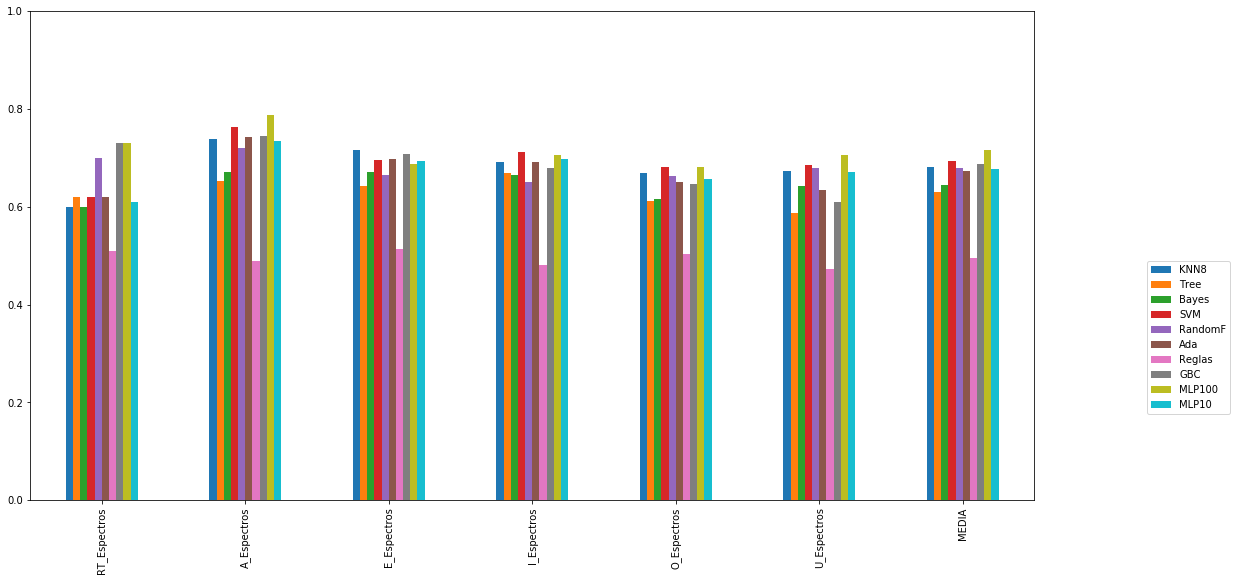

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: rt_espectros con MLP. Los 3 mejores:  MLPs, RF y ADA. **(0.78 rt_espectros con MLP100.)**. 0 por encima del 0.8. Resultados en la tónica de los obtenidos conresultados anteriores.

In [0]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True) #Normalizamos
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Espectros,0.680000,0.660000,0.600000,0.510000,0.750000,0.620000,0.510000,0.730000,0.780000,0.750000
A_Espectros,0.720000,0.649524,0.671905,0.689524,0.744524,0.741905,0.478571,0.758571,0.692143,0.674048
E_Espectros,0.726880,0.637956,0.670222,0.624737,0.644384,0.698194,0.464516,0.708071,0.690558,0.622340
I_Espectros,0.701829,0.644905,0.665850,0.640321,0.680647,0.691863,0.504648,0.676583,0.705004,0.694659
O_Espectros,0.653066,0.624171,0.615316,0.618712,0.646382,0.651271,0.533897,0.635009,0.615459,0.599459
U_Espectros,0.681692,0.614615,0.642615,0.670769,0.670462,0.634769,0.515846,0.627077,0.610769,0.638462
MEDIA,0.693911,0.638528,0.644318,0.625677,0.689400,0.673000,0.501246,0.689218,0.682322,0.663161


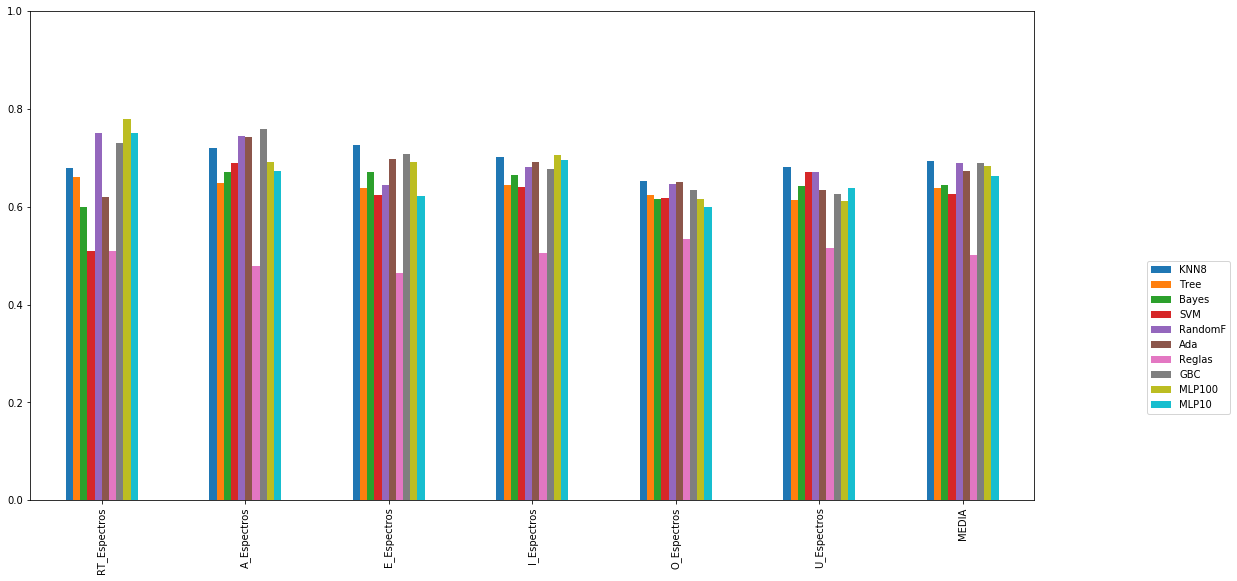

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es A_espectrospor lo general, 5 clasificadores superan el 0.8 con este dataset.. Los 2 mejores son MLP y GBC y GBC **(0.84 A_espectros con MLP)**. Mejora la media de los resultados: 7 por encima del 0.8

Resultados en torno a los obtenidos en anteriores experimentos pero sin llegar a los mejores (Ada-art_campana 0.88).

In [0]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Espectros,0.614000,0.700000,0.670000,0.700000,0.828000,0.684000,0.460000,0.736000,0.792000,0.532000
A_Espectros,0.832698,0.673571,0.705340,0.806646,0.770150,0.801907,0.499048,0.829113,0.843644,0.806546
E_Espectros,0.783160,0.649524,0.699943,0.748823,0.731329,0.762102,0.457143,0.777138,0.713079,0.693646
I_Espectros,0.766251,0.620055,0.713980,0.780306,0.788759,0.738367,0.500934,0.744252,0.754796,0.746497
O_Espectros,0.726338,0.620696,0.668618,0.753254,0.710352,0.724176,0.514881,0.724768,0.717371,0.700465
U_Espectros,0.740064,0.608654,0.732988,0.757988,0.746721,0.667456,0.519231,0.693590,0.752761,0.710207
MEDIA,0.743752,0.645417,0.698478,0.757836,0.762552,0.729668,0.491873,0.750810,0.762275,0.698227


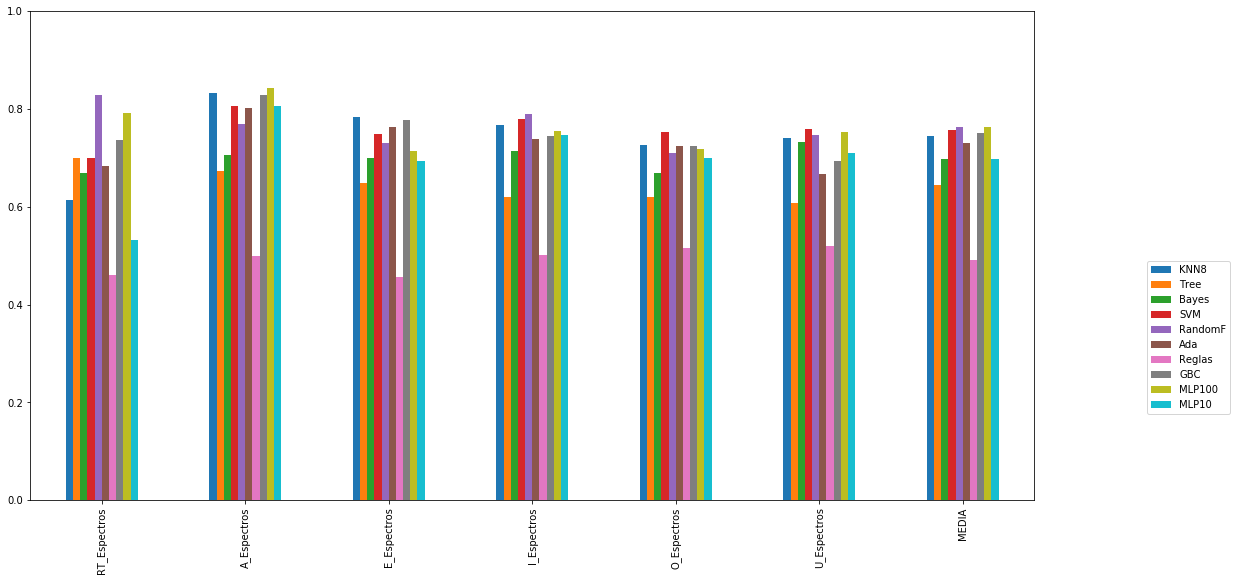

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con los espectros de read-text y de la vocal A, con MLP, ADA y GBC siguiendo la magnitud de los resultados de anteriores experimentos.

 6 están por encima del 0.8. Mejor son MLP con diferencia y le sigue Gbc en algunos datasets.. Resultados del orden de los más normales: **(0.82 GBC-A_espectros)**, el mejor hasta ahora era GB-art_campana 0.89.


In [0]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [0]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC,MLP100,MLP10
RT_Espectros,0.686000,0.660000,0.674000,0.540000,0.784000,0.656000,0.610000,0.728000,0.804000,0.816000
A_Espectros,0.818685,0.632143,0.706451,0.688601,0.735891,0.801907,0.460238,0.829937,0.778206,0.744417
E_Espectros,0.814372,0.653095,0.699943,0.695043,0.784356,0.762102,0.498810,0.794955,0.734435,0.627628
I_Espectros,0.785459,0.644304,0.713980,0.705850,0.744201,0.738367,0.480495,0.750918,0.786319,0.779702
O_Espectros,0.695217,0.609112,0.668618,0.674091,0.744844,0.724176,0.483425,0.726796,0.678416,0.663412
U_Espectros,0.737451,0.558974,0.732988,0.722633,0.733383,0.667456,0.471795,0.696795,0.705868,0.693343
MEDIA,0.756197,0.626271,0.699330,0.671036,0.754446,0.725001,0.500794,0.754567,0.747874,0.720750


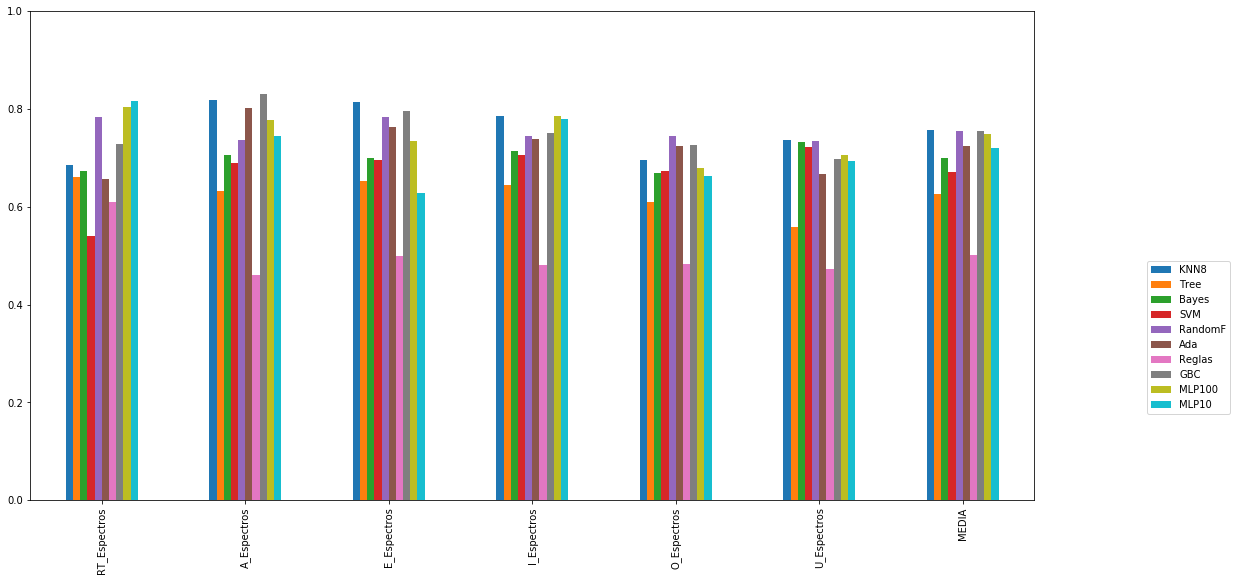

In [0]:
ex.process_results(all_results, data_names, model_names, 'bar')

---

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING:AUC.  **Mejores resultados normalizando**.

Los resultados obtenidos son del **orden de los mejores con este experimento hasta el momento, al igual que los embeddings** Sin embargo los embbedings llegan hasta 0.87 y con los espectros llegamos al 0.86. Hemos añadido el valor 'auto' al parámetro gamma. Orozco no lo hace, pero consideramos que por esto ha sido la mejora de los resultados.

En anteriores experimentos solo se llegaba al 0.77 como mucho. **En este caso el mejor resultado se obtiene para los espectros de la vocal A con un AUC de 0.86**

In [0]:
def best_to_panda(mej):
    return pd.DataFrame.from_dict(mej, orient='index',columns=['SCORE']).sort_values(by=['SCORE'], ascending=False)

In [0]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,5000,10000], 'kernel': ['rbf','linear'], 'gamma' : ['auto',1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosVggishEspectros,svm.SVC(),param_grid, verbose=True, normalizar=True)
clear_output()

In [0]:
best_to_panda(bestsOrz)

,SCORE
vggish_espec_v_A,0.861816
vggish_espec_rt,0.828000
vggish_espec_v_U,0.802465
vggish_espec_v_E,0.801664
vggish_espec_v_I,0.781054
vggish_espec_v_O,0.763046


### 1.2.B [Apartado Formativo] Recalcar importancia de bísqueda de parámetros. <a id="GSfrom"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Compararemos los resultados para un dataset concreto con búsqueda de parámetros y con params por defecto.**Vemos como tiene un incremento de 19% en ROC** debido a la optimización de parámteros.

#### Busqueda de parametros

In [0]:
#Definimos pipeline y malla de parametros
param_grid = [
      {'clf__C': [1,10,20,100,500,1000,5000,10000], 'clf__kernel': ['rbf'], 'clf__gamma' : ['auto',1,10,20,50,200,1000]},
 ]
pip = Pipeline([('select', MinMaxScaler()), ('clf', svm.SVC())])


In [0]:
#Cargamos los datos
loader = cargaDatosVggishEspectros
conjunto = loader.load_vggish_espec_rt()
X = conjunto.data
y = conjunto.target

#Creamos el objeto gridSearch
clf = GridSearchCV(pip, cv=10, param_grid=param_grid, scoring = 'roc_auc')

In [0]:
#Calculamos roc, de esta manera hace nested-CV
cross_val_score(clf,X,y,cv=10,scoring='roc_auc').mean()

0.8400000000000001

#### Calculo CV con parametros por defecto de SVC 
**Los parametros por defecto ya estaban en el param_grid (C=1, kernel=rbf, gamma='auto').** Por ello se supone que si ha optimizado parametros en el anterior caso, el anterior resultado deberá ser mejor o como mucho igual a este, en el caso de que los parámetros óptimos hayan sido los de por defecto.

In [0]:
#Definimos pipeline para hacer CVscore con valores por defecto SVC (C=1, kernel=rbf, gamma='auto')
pip = Pipeline([('select', MinMaxScaler()), ('clf', svm.SVC())])

#Cargamos los datos
loader = cargaDatosVggishEspectros
conjunto = loader.load_vggish_espec_rt()
X = conjunto.data
y = conjunto.target

In [0]:
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.5599999999999999

---

## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: **GBC - A_espectros: 0.83**. Resultados normales en el orden de anteriores pero sin acercarse a los mejores resultados conseguidos hasta ahora en este experimento (0.88 - mujeres_w_campana).

In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        params = 'chi2, k=19' if selector == 'SelectKBest' else ''
        estimators = [('norm',MinMaxScaler()),('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [0]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'MLPClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,MLPClas
vggish_espec_rt,0.684000,0.732000,0.560000,0.792000
vggish_espec_v_A,0.801907,0.831664,0.689111,0.770569
vggish_espec_v_E,0.762102,0.788277,0.692562,0.710991
vggish_espec_v_I,0.738367,0.749218,0.714728,0.792177
vggish_espec_v_O,0.724176,0.733686,0.672316,0.673429
vggish_espec_v_U,0.667456,0.698570,0.720661,0.713757


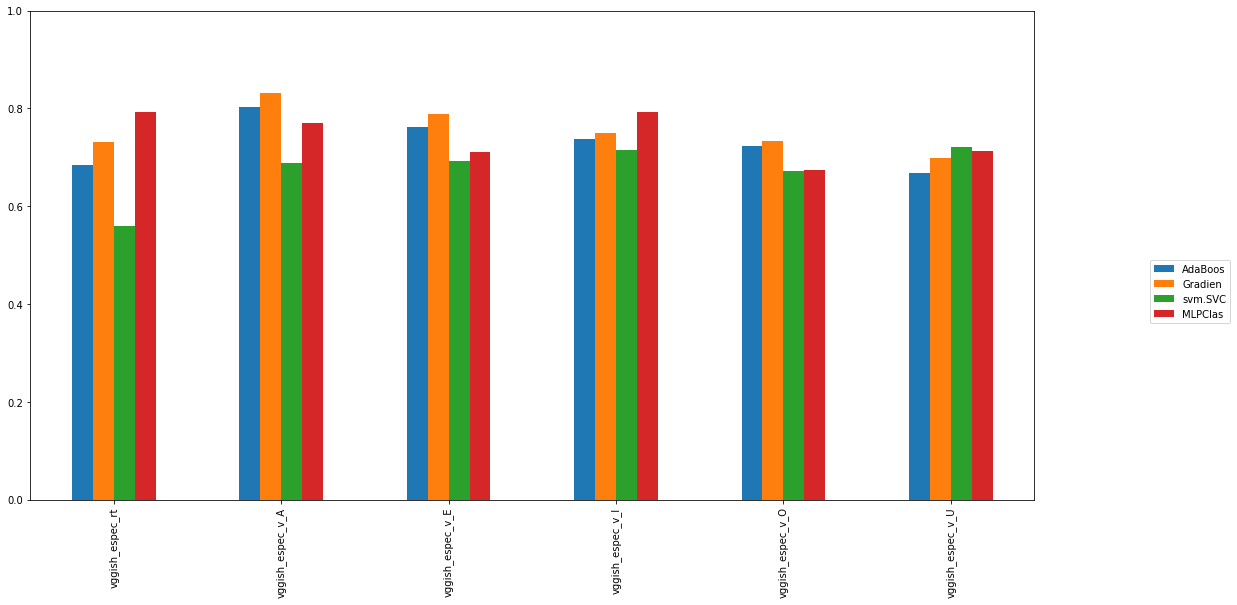

In [0]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

---

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: **MLP - A_espectros: 0.76**. Resultados normales en el orden de anteriores pero sin acercarse a los mejores resultados conseguidos hasta ahora en este experimento (0.83 hombres_w_gat).

In [0]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'MLPClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,MLPClas
vggish_espec_rt,0.560000,0.728000,0.596000,0.612000
vggish_espec_v_A,0.720830,0.747902,0.725485,0.761893
vggish_espec_v_E,0.704029,0.736447,0.697215,0.689964
vggish_espec_v_I,0.692263,0.700971,0.688668,0.729139
vggish_espec_v_O,0.681727,0.690342,0.639567,0.647513
vggish_espec_v_U,0.710996,0.700690,0.696400,0.696795


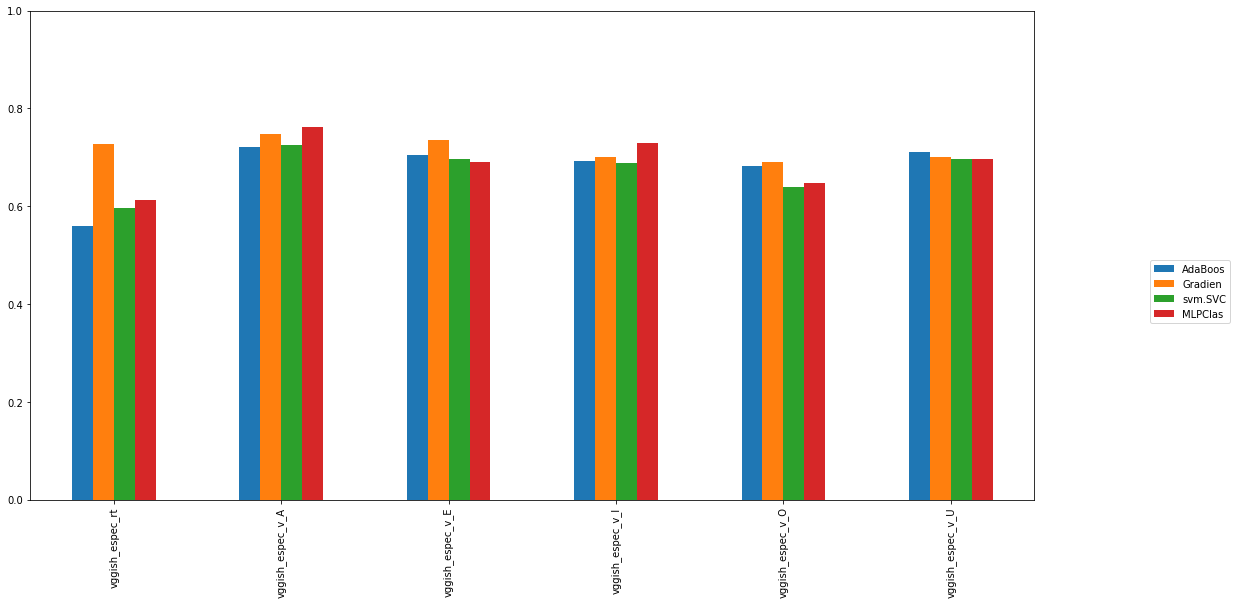

In [0]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

---

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados parecidos en magnitud, aunque un poco menor, a los obtenidos con Disvoice . Con ccas disvoice se tenían resultados del orden de 0.8 altos incluso 0.9. Aquí los mejores tanto para normalizados como para no son **vggish_espec_v_A:0.81**. Uno solo por encima del 0.8.

##### Sin Normalizar 

In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.04, 0.03, 0.01])
                                     
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(modulo, pip, param_grid, verbose=False, normalizar=False)

In [0]:
best_to_panda(bestsGsVtAda)

,SCORE
vggish_espec_v_A,0.818234
vggish_espec_v_I,0.777585
vggish_espec_v_O,0.737017
vggish_espec_v_E,0.715878
vggish_espec_rt,0.684000
vggish_espec_v_U,0.637673


##### Normalizando

In [0]:
param_grid = dict(select__threshold=[0.05, 0.04, 0.03, 0.02, 0.01])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=False, normalizar=True)

In [0]:
best_to_panda(bestsGsVtAdaN)

,SCORE
vggish_espec_v_A,0.796510
vggish_espec_v_E,0.776322
vggish_espec_v_I,0.736803
vggish_espec_v_O,0.712426
vggish_espec_rt,0.668000
vggish_espec_v_U,0.642702


-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Para este experimento, son los mejores resultados obtenidos con todos los datasets (Disvoice's, embeddings Vggish y este).** Sin embargo, **NO es el mejor resultado de TODOS los experimentos con TODOS los datasets.** Es decir, PAra el experimento de SKBest y Random Forest hemos obtenido la AUC mayor 0.84, pero este valor está lejor de los mejores resultados obtenidos con Disvoice y el experimento SKbest+ADA (0.9).

In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)


In [0]:
best_to_panda(bestsGsSkRfN)

,SCORE
vggish_espec_v_A,0.842600
vggish_espec_v_E,0.795969
vggish_espec_rt,0.766000
vggish_espec_v_U,0.756632
vggish_espec_v_I,0.748571
vggish_espec_v_O,0.717906


---

## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Se obtienen resultados bastante peores que en las ccas de Disvoice donde llegabamos hasta el 0.9 en el caso de las mujeres. En este caso el mejor resultado es **0.788 para embed_A**.

In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)

In [0]:
best_to_panda(bestsGsSkADAN)

,SCORE
vggish_espec_v_A,0.787980
vggish_espec_v_E,0.764785
vggish_espec_v_I,0.736630
vggish_espec_rt,0.712000
vggish_espec_v_O,0.697753
vggish_espec_v_U,0.672239


---

## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

Tampoco llegamos a batir los resultados obtenidos anteriormente. El mejor resultado en este caso es **espec_A 0.805**.


In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',10,15,22,50,100])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)

In [0]:
best_to_panda(bestsGsSkGBCN)

,SCORE
vggish_espec_v_A,0.805397
vggish_espec_v_E,0.782671
vggish_espec_rt,0.740000
vggish_espec_v_I,0.703574
vggish_espec_v_O,0.701268
vggish_espec_v_U,0.658037


---

## 1.9 Grid Search - MLP<a id="MLP"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [0]:
modulo = cargaDatosVggishEspectros

In [0]:
ex = Experimenter()
param_grid = dict(select__k=['all',15,100], clf__hidden_layer_sizes=[10,50,100 ], clf__learning_rate =['constant', 'adaptive'], clf__learning_rate_init=[0.001,0.005], clf__tol=[1e-4,1e-3])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', MLPClassifier())])
bestsMLP = ex.GridSearchPipe(modulo, pip, param_grid,verbose=True, normalizar=True)

In [9]:
best_to_panda(bestsMLP)

,SCORE
vggish_espec_v_A,0.768281
vggish_espec_rt,0.764000
vggish_espec_v_I,0.761871
vggish_espec_v_E,0.732000
vggish_espec_v_U,0.653945
vggish_espec_v_O,0.652078
